<a href="https://colab.research.google.com/github/HusnaRiyaz/British_Airways/blob/main/British_Airways_Task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10 #10
page_size = 100 #100

reviews = []
aircraft = []
seat_type = []
route = []
recommended = []
df = pd.DataFrame()

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    rating = []
    category = []

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    for para2 in parsed_content.find_all("div", {"class" : "review-stats"}):
        for para3 in para2.find_all('td',{'class' : 'review-value'}):
            rating.append(para3.get_text())
        recomend = rating[-1]
        rating = rating[:-1]

        for para4 in para2.find_all('td',{'class' : 'review-rating-stars stars'}):
            para5 = len(para4.find_all('span', {'class' : 'star fill'}))
            rating.append(para5)
        rating.append(recomend)
        #print(rating)

        for para6 in para2.find_all('td',{'class' : 'review-rating-header'}):
            category.append(para6.get_text())

        #print(category)
        # Create the records from both list, using zip and dict calls.

        # Build the dataframe from the dictionary.
        data_dict = pd.DataFrame([rating], columns=category)
        df = df.append(data_dict, ignore_index=True).reset_index(drop=True)
        #print(df)
        rating = []
        category = []

    print(f"   ---> {len(reviews)} total reviews")

df["reviews"] = reviews

In [ ]:
df.sample(5)

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
873,Boeing 747,Business,Business Class,Phoenix to Accra via London,November 2018,5.0,5.0,5.0,3.0,5.0,NaN,5,yes,✅ Trip Verified | Phoenix to Accra via London...
494,A320,Solo Leisure,Economy Class,Budapest to Billund via London,December 2019,3.0,3.0,2.0,1.0,4.0,NaN,3,yes,✅ Trip Verified | Budapest to Billund return ...
168,A380,Family Leisure,Business Class,San Francisco to London,July 2022,4.0,5.0,4.0,4.0,4.0,5.0,4,yes,✅ Trip Verified | Flight on A380 SFO to LHR. ...
621,Boeing 747,Family Leisure,Premium Economy,Boston to Copenhagen via London,June 2019,1.0,1.0,1.0,1.0,1.0,1.0,1,no,✅ Trip Verified | My flight was cancelled 3 da...
841,Airbus A320,Couple Leisure,Economy Class,London to Athens,December 2018,4.0,1.0,NaN,NaN,2.0,NaN,4,no,✅ Trip Verified | London to Athens. We were f...


In [ ]:
df.to_csv("BA_reviews.csv", index=False)

In [ ]:
df = pd.read_csv('BA_reviews.csv')

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [ ]:
df.shape

(1000, 14)

In [ ]:
df.reviews= df.reviews.str.split('|',expand=True)[1]



In [ ]:
df

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended,reviews
0,Boeing 777,Couple Leisure,Premium Economy,Seattle to Zagreb via London,April 2023,3.0,2.0,1.0,1.0,3.0,1.0,2,no,Food was lousy. Who ever is planning the Asi...
1,Boeing 777,Family Leisure,Premium Economy,"Bangalore to Toronto via London,",April 2023,2.0,1.0,2.0,3.0,1.0,NaN,1,no,Had the worst experience. The flight from Lon...
2,Dreamliner,Family Leisure,Economy Class,London to Denver,February 2023,2.0,1.0,1.0,3.0,1.0,1.0,2,no,The ground staff were not helpful. Felt like...
3,A350,Solo Leisure,Premium Economy,London to Hong Kong,April 2023,4.0,5.0,4.0,3.0,4.0,NaN,4,yes,Second time BA Premium Economy in a newer ai...
4,NaN,Couple Leisure,Economy Class,Brussels to Los Angeles via London Heathrow,April 2023,1.0,4.0,1.0,3.0,1.0,1.0,1,no,They changed our Flights from Brussels to Lo...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Boeing 747 / 777,Solo Leisure,Premium Economy,Delhi to London,June 2018,4.0,4.0,4.0,4.0,4.0,NaN,4,yes,Delhi to London. Having read many negative r...
996,Boeing 787(9),Couple Leisure,Business Class,Seychelles to London,June 2018,2.0,3.0,3.0,3.0,1.0,NaN,1,no,When you travel British Airways its like you ...
997,A320,Couple Leisure,Business Class,Gatwick to Gibraltar,June 2018,5.0,5.0,5.0,NaN,4.0,NaN,4,yes,British Airways gets plenty of well deserved...
998,A380,Business,First Class,London to Vancouver,June 2018,2.0,4.0,2.0,2.0,2.0,NaN,4,no,BA First Class is not even that any more. St...


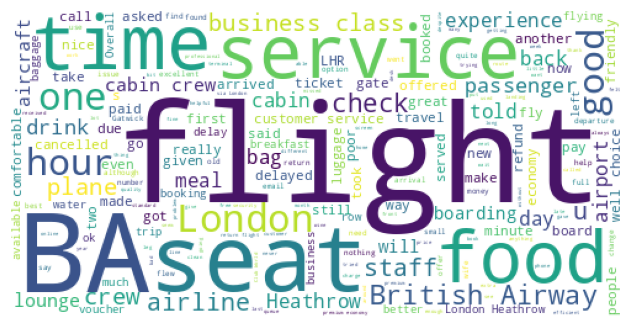

In [ ]:
review_word = []

for i in df['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 500, height = 250, background_color = 'white').generate(unique_string)
plt.figure(figsize=(10,4))
plt.imshow(wc)
plt.axis("off")
plt.show()

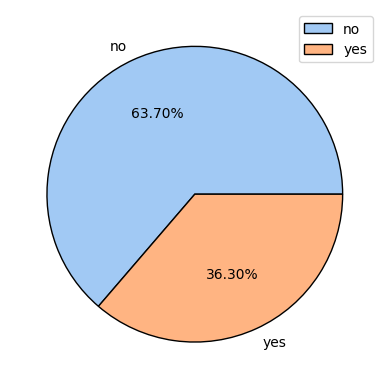

In [ ]:
soc = df.groupby('Recommended')['reviews'].count().reset_index()
plt.pie(soc['reviews'], labels = soc['Recommended'], autopct='%.2f%%',colors = sns.color_palette('pastel'),
          wedgeprops={"edgecolor":"k"},)
plt.legend()
plt.show()

In [ ]:
df_soc = df[df['Recommended'] == 'no']
df_soc.describe()

,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money
count,562.000000,555.000000,462.000000,318.000000,585.000000,148.000000,637.000000
mean,2.096085,2.432432,1.870130,2.132075,1.929915,1.540541,1.609105
std,1.078729,1.327450,1.058186,1.207825,1.209357,1.032653,0.884588
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,1.500000,2.000000,1.000000,1.000000,1.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
data = df_soc[df_soc['reviews'].str.contains('food | drinks ')]
data['reviews'].to_csv('test.csv')

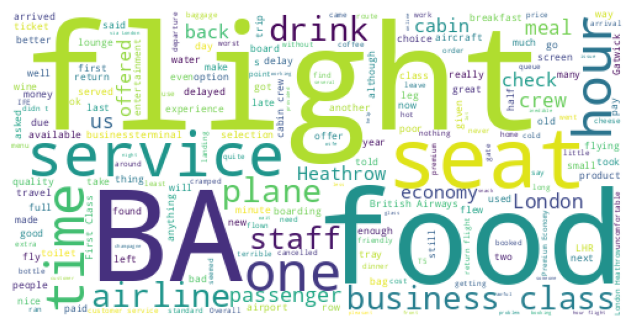

In [ ]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 500, height = 250, background_color = 'white').generate(unique_string)
plt.figure(figsize=(10,4))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [ ]:
data = df_soc[df_soc['reviews'].str.contains('money | refund & value')]
data['reviews'].to_csv('test2.csv')

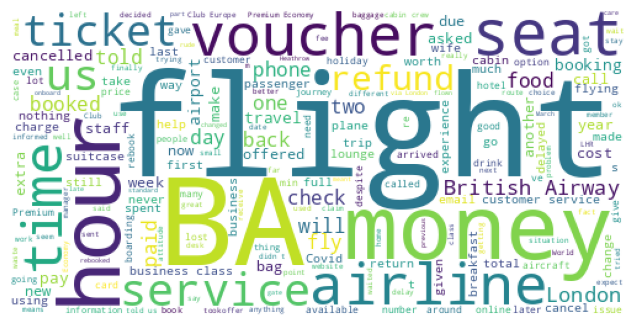

In [ ]:
review_word = []

for i in data['reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)

unique_string = (" ").join(review_word)

wc = WordCloud(width = 500, height = 250, background_color = 'white').generate(unique_string)
plt.figure(figsize=(10,4))
plt.imshow(wc)
plt.axis("off")
plt.show()